## Plotting and tabbing IBD graph features

This notebook processes simulated data to make plots and tables.

This was made to study the IBD graph versus Erdos Renyi features.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
plt.rc('font',size=12)

### Erdos Renyi

In [3]:
ne = 'three-phase-2000G.ne'
# ne = 'bottleneck-1000G.ne'
# ne = 'constant-100k-2000G.ne'
size = 2000
cM = 2.0
sim = 250
rep = 500
pre = '../data/structures'
pre2 = '../data/erdosrenyi'
filename = pre + '-' + ne + '-size' + str(size) + '-cM' + str(cM) + '-sim' + str(sim) + '-rep' + str(rep) + '.txt'
filename2 = pre2 + '-' + ne + '-size' + str(size) + '-cM' + str(cM) + '-sim' + str(sim) + '-rep' + str(rep) + '.txt'

In [64]:
g=open(filename)
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    for rep in reps:
        details = rep.split(',')
        for j in range(J):
            table[columns[j]].append(int(details[j]))


g.close()

pdtable = pd.DataFrame(table)

In [65]:
g=open(filename2)
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    for rep in reps:
        details = rep.split(',')
        for j in range(J):
            table[columns[j]].append(int(details[j]))


g.close()

pdtable2 = pd.DataFrame(table)

In [72]:
bins = 20
ec = 'k'

# ic = 'tab:blue'
# ic2 = 'tab:orange'
# column = 'tree_order2'
# xlab = '# trees of order 2'

# ic = 'tab:cyan'
# ic2 = 'tab:pink'
# column = 'tree_order3'
# xlab = '# trees of order 3'

# ic = 'tab:purple'
# ic2 = 'tab:olive'
# column = 'iscomplete'
# xlab = '# complete components of size >= 3'

ic = 'tab:green'
ic2 = 'tab:brown'
column = 'num_tracts'
xlab = '# of edges'

alpha = 0.5

pngname = 'hist-' + column + '-' + ne + '-size' + str(size) + '-cM' + str(cM)

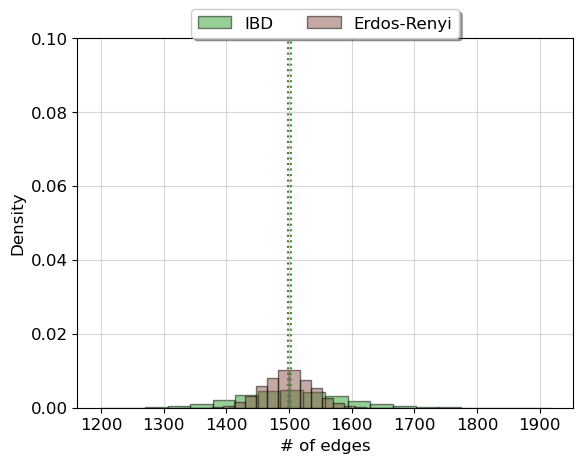

In [73]:

fig = plt.figure()
ax = plt.subplot(111)

plt.hist(pdtable[column],bins,edgecolor=ec,color=ic,label='IBD', density=True, alpha=alpha)
plt.hist(pdtable2[column],bins,edgecolor=ec,color=ic2, label='Erdos-Renyi', density=True, alpha=alpha)
plt.xlabel(xlab)
plt.ylabel('Density')

plt.axvline(pdtable[column].mean(), color=ic, linestyle='dotted')
plt.axvline(pdtable2[column].mean(), color=ic2, linestyle='dotted')

# plt.legend(loc='upper center')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True, shadow=True)

plt.ylim(0,0.10)
plt.grid(alpha=0.5)

# plt.savefig('../figures/structures/' + pngname + '.png')
# plt.savefig('../figures/structures/' + pngname + '.tiff')

plt.show()

### Tables for EG comparison

In [55]:
# ne = 'three-phase-2000G.ne'
# ne = 'bottleneck-1000G.ne'
ne = 'constant-100k-2000G.ne'
size = 2000
cM = 2.0
sim = 250
rep = 500
pre = '../data/structures/structures'
suf = '../tables/structures'
# pre = '../data/structures/erdosrenyi'
# suf = '../tables/erdosrenyi'
filename = ne + '-size' + str(size) + '-cM' + str(cM) + '-sim' + str(sim) + '-rep' + str(rep)

g=open(pre + '-' + filename + '.txt')
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    for rep in reps:
        details = rep.split(',')
        for j in range(J):
            table[columns[j]].append(int(details[j]))

g.close()

pdtable = pd.DataFrame(table)
pdtable.head()

,num_tracts,largest_component,tree_order2,tree_order3,tree_order4,tree_order5,complete3,complete4,complete5,iscomplete
0,1968,12,513,38,1,0,158,1,0,159
1,2006,8,494,33,1,0,182,1,0,183
2,2035,10,506,36,4,0,184,4,0,188
3,1879,12,526,26,4,0,163,4,0,167
4,1946,10,511,35,2,0,170,2,0,172


In [56]:
indices = [0,1,2,3,-1]
K = len(indices)

g=open(pre + '-' + filename + '.txt')
g.readline()
columns = g.readline().strip().split(',')

# ads = [[] for k in range(K)]
sws = [[] for k in range(K)]
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    vals = [[] for k in range(K)]
    for rep in reps:
        details = rep.split(',')
        for k in range(K):
            idx = indices[k]
            vals[k].append(int(details[idx]))
    for k in range(K):  
        # ad = scipy.stats.anderson(vals[k],'norm').pvalue
        sw = scipy.stats.shapiro(vals[k]).pvalue
        # ads[k].append(ad)
        sws[k].append(float(sw))

g.close()

In [57]:
type1 = 0.05
type1s = []
for k in range(K):
    vec = [sw < type1 for sw in sws[k]]
    type1s.append(sum(vec)/float(sim))

In [58]:
columns = ['num_tracts', 'largest_component','tree_order2','tree_order3', 'iscomplete']
# summarystatistics = ['mean','var','min','25%','50%','75%','max']
summarystatistics = ['mean','var','min','max']
out = pdtable[columns].describe()
out = out.T
out['var'] = out['std'] ** 2
out = out[summarystatistics]
print(out.columns)
out.rename(columns={'mean':'Avg',
                    'var':'Var',
                    'min':'Min',
                    # '25%':'0.25',
                    # '50%':'0.50',
                    # '75%':'0.75',
                    'max':'Max'
                   },
           index={'num_tracts':'Tracts',
                  'largest_component':'Largest',
                  'tree_order2':'Tree2',
                  'tree_order3':'Tree3',
                  # 'tree_order4':'Tree4',
                  # 'complete3': 'Complete3',
                  'iscomplete': 'Complete>= 3'
                 },
           inplace=True
          )
out['Sig'] = type1s
out.to_csv(suf + '-' + filename + '.tsv',sep='\t',header=True,index=True)
# out.rename( = pd.Index(['Avg','Var','Min','0.25','0.50','0.75','Max'])
print(out.columns)
# out.index = ['Edges','Largest','Tree2','Tree3','Tree4','Complete3','Complete All']
out = out.style.format(decimal='.', thousands=',', precision=2)
out

Index(['mean', 'var', 'min', 'max'], dtype='object')
Index(['Avg', 'Var', 'Min', 'Max', 'Sig'], dtype='object')


,Avg,Var,Min,Max,Sig
Tracts,"1,954.07","5,534.83","1,639.00","2,304.00",0.24
Largest,10.43,3.23,6.00,27.00,1.00
Tree2,502.59,383.90,415.00,582.00,0.08
Tree3,34.44,33.41,13.00,63.00,0.67
Complete>= 3,179.44,144.65,131.00,232.00,0.08


In [98]:
print(out.to_latex())

\begin{tabular}{lrrrrr}
 & Avg & Var & Min & Max & Sig \\
Tracts & 1,312.68 & 1,313.06 & 1,158.00 & 1,475.00 & 0.07 \\
Largest & 27.02 & 74.07 & 11.00 & 137.00 & 1.00 \\
Tree2 & 353.31 & 310.32 & 284.00 & 434.00 & 0.08 \\
Tree3 & 120.31 & 109.73 & 78.00 & 173.00 & 0.14 \\
Complete>= 3 & 174.94 & 146.10 & 123.00 & 228.00 & 0.13 \\
\end{tabular}



### Tables for selection

In [88]:
# ne = 'three-phase-2000G.ne'
ne = 'constant-100k-2000G.ne'
size = 2000
cM = 3.0
sim = 250
rep = 500
# selcoef = 0.02
# selcoef = 0.015
# selcoef = 0.01
selcoef = 0.005
pre = '../data/structures/isweepsel'
suf = '../tables/isweepsel'
filename = '-selcoef' + str(selcoef) + '-freq0.33-' + ne + '-size' + str(size) + '-cM' + str(cM) + '-sim' + str(sim) + '-rep' + str(rep)

g=open(pre+filename+'.txt')
g.readline()
g.readline()
g.readline()
columns = g.readline().strip().split(',')
table = dict()
for col in columns:
    table[col] = []
J = len(columns)
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    for rep in reps:
        details = rep.split(',')
        for j in range(J):
            table[columns[j]].append(int(details[j]))

g.close()

pdtable = pd.DataFrame(table)

pdtable.head()


,num_tracts,largest_component,tree_order2,tree_order3,tree_order4,tree_order5,complete3,complete4,complete5,iscomplete
0,1219,6,496,31,5,0,152,5,0,157
1,1287,8,483,26,4,0,120,4,0,124
2,1391,10,492,35,3,0,153,3,0,156
3,1387,9,492,27,2,0,144,2,0,146
4,1217,8,499,33,6,0,121,6,0,127


In [89]:
indices = [0,1,2,3,-1]
K = len(indices)

g=open(pre+filename+'.txt')
g.readline()
g.readline()
g.readline()
columns = g.readline().strip().split(',')

# ads = [[] for k in range(K)]
sws = [[] for k in range(K)]
    
g.readline()
while True:
    row = g.readline().strip()
    reps = row.split('\t')
    if row == '':
        break
    vals = [[] for k in range(K)]
    for rep in reps:
        details = rep.split(',')
        for k in range(K):
            idx = indices[k]
            vals[k].append(int(details[idx]))
    for k in range(K):  
        # ad = scipy.stats.anderson(vals[k],'norm').pvalue
        sw = scipy.stats.shapiro(vals[k]).pvalue
        # ads[k].append(ad)
        sws[k].append(float(sw))

g.close()

In [90]:
type1 = 0.05
type1s = []
for k in range(K):
    vec = [sw < type1 for sw in sws[k]]
    type1s.append(sum(vec)/float(sim))

In [91]:
columns = ['num_tracts', 'largest_component','tree_order2','tree_order3','iscomplete']
# summarystatistics = ['mean','var','min','25%','50%','75%','max']
summarystatistics = ['mean','var','min','max']
out = pdtable[columns].describe()
out = out.T
out['var'] = out['std'] ** 2
out = out[summarystatistics]
print(out.columns)
out.rename(columns={'mean':'Avg',
                    'var':'Var',
                    'min':'Min',
                    # '25%':'0.25',
                    # '50%':'0.50',
                    # '75%':'0.75',
                    'max':'Max'
                   },
           index={'num_tracts':'Tracts',
                  'largest_component':'Largest',
                  'tree_order2':'Tree2',
                  'tree_order3':'Tree3',
                  # 'tree_order4':'Tree4',
                  # 'complete3': 'Complete3',
                  'iscomplete': 'Complete>=3'
                 },
           inplace=True
          )
out['Sig'] = type1s
# out.to_csv(suf+filename+'.tsv',sep='\t',header=True,index=True)
# out.rename( = pd.Index(['Avg','Var','Min','0.25','0.50','0.75','Max'])
print(out.columns)
# out.index = ['Edges','Largest','Tree2','Tree3','Tree4','Complete3','Complete All']
out = out.style.format(decimal='.', thousands=',', precision=2)
out

Index(['mean', 'var', 'min', 'max'], dtype='object')
Index(['Avg', 'Var', 'Min', 'Max', 'Sig'], dtype='object')


,Avg,Var,Min,Max,Sig
Tracts,"1,290.81","2,740.70","1,083.00","1,618.00",0.17
Largest,8.22,1.97,5.00,22.00,1.00
Tree2,482.86,347.66,406.00,564.00,0.04
Tree3,29.49,28.50,11.00,55.00,0.76
Complete>=3,136.09,111.95,83.00,183.00,0.16


In [605]:
print(out.to_latex())

\begin{tabular}{lrrrrr}
 & Avg & Var & Min & Max & Sig \\
Tracts & 543.43 & 1,414.95 & 394.00 & 749.00 & 0.42 \\
Largest & 9.16 & 6.06 & 5.00 & 37.00 & 1.00 \\
Tree2 & 240.03 & 197.32 & 178.00 & 312.00 & 0.10 \\
Tree3 & 23.55 & 22.48 & 5.00 & 49.00 & 0.92 \\
Tree4 & 3.00 & 2.97 & 0.00 & 13.00 & 1.00 \\
Complete3 & 51.55 & 46.80 & 24.00 & 85.00 & 0.38 \\
CompleteAll & 54.55 & 48.96 & 27.00 & 87.00 & 0.36 \\
\end{tabular}

